# Building Naive Bayes classification model

## Introduction

This project will build an effective naive bayes classification.
The goal is to:
- Build a naive bayes model to make predictions for a dependent variable based on one independent variable.

Before building and executing the naive bayes classification model, basic EDA, data cleaning, and other manipulations may be conducted to prepare the data for modeling.

Modeling follows the steps:
1. Importing packages and loading data
2. Exploring the data and completing the cleaning process
3. Building a naive bayes classification model
4. Evaluating the naive bayes classification model using a confusion matrix

### Step 1: Importing packages and loading data

#### 1.1. Import packages

Import relevant Python packages.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#### 1.2. Load the dataset

Load the `naive-bayes-classification.csv` dataset. Save the data to `df_original`, a pandas `DataFrame` object.

The original dataset is from the link below.
- https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data


In [2]:
df_original = pd.read_csv('../../../data/naive-bayes-classification.csv')
df_original

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


### Step 2: Exploring the data and completing the cleaning process

#### 2.1. Prepare the data

After loading the dataset, prepare the data to be suitable for a naive bayes classification model.
- Exploring the daa
- Checking for missing values
- Encoding the data
- Split the `original` dataset into `train` and `test` dataset. 

#### 2.2. Explore the data

Check the data type of each column. Note that naive bayes classification models expect numeric data. 

In [9]:
df_original.dtypes

glucose          int64
bloodpressure    int64
diabetes         int64
dtype: object

#### 2.3. Check the number of target values in the dataset

To predict diabetes, check how much the target values in the dataset are differently distributed before modeling.

In [10]:
df = df_original.copy()
df['diabetes'].value_counts(normalize=True)

1    0.500503
0    0.499497
Name: diabetes, dtype: float64

`50.1%` of the patients were diabetes. While this is a simple calculation, this value can be compared to a naive bayes classification model's accuracy. 

There is no big difference between `diabetes` and `non-diabetes`. No need to worry about data skewing.

#### 2.4. Check for missing values

Check the missing values in the rows of the data.

In [11]:
df.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

There is no missing value. Just keep going.

#### 2.5. Split the `original` dataset into `train` and `test` dataset. 

- Put `70%` into `train` set
- Put `30%` into `test` set
- `X` is independent variable
- `y` is dependent(or target) variable

In [12]:
y = df['diabetes']
X = df.drop(columns=['diabetes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((696, 2), (299, 2), (696,), (299,))

### Step 3: Building a naive bayes classification model

#### 3.1. Build & Fit a naive bayes classification model

Build a `Gaussian Naive Bayes` classification model and fit the model to the training data.

In [13]:
nb = GaussianNB().fit(X_train, y_train)
y_preds = nb.predict(X_test)
# y_preds

In [18]:
# Save the model object to make other apps use it.
joblib.dump(nb, '../../../model/naive_bayes.pkl')

['../../../model/naive_bayes.pkl']

### Step4. Evaluating a binomial logistic regression model using a confusion matrix

#### 4.1. Review 4 scores

* `Accuracy` (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. It tends to be the metric that stakeholders can best understand.

* `Precision` (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations.

* `Recall` (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

* `F1`: The harmonic average of precision and recall, which takes into account both false positives and false negatives.

In [16]:
print('accuracy score:\t', '%.3f' % accuracy_score(y_test, y_preds))
print('precision score:', '%.3f' % precision_score(y_test, y_preds))
print('recall score:\t', '%.3f' % recall_score(y_test, y_preds))
print('f1 score:\t', '%.3f' % f1_score(y_test, y_preds))

accuracy score:	 0.933
precision score: 0.937
recall score:	 0.937
f1 score:	 0.937


All the metrics are very high scores over `93.7%`.

They indicate that this model predicts very well.

#### 4.2. Produce a confusion matrix

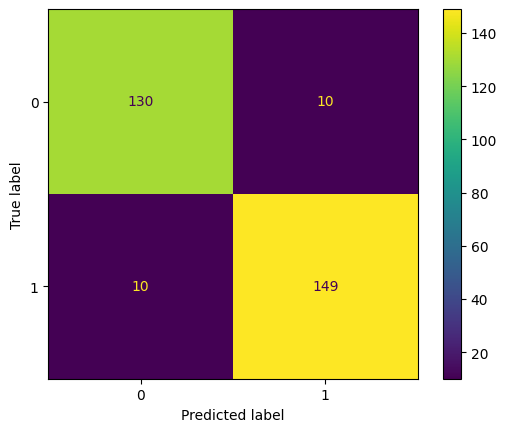

In [17]:
cm = confusion_matrix(y_test, y_preds, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

#### 4.3. Analyze the matrix.

- Both `false positive` and `false negative` are under `10`, which are extreamly low numbers.
- Both `true positive` and `true negative` are high numbers above `130`.
- There isn't a large difference between `false positive` and `false negative`. 

### Considerations

#### Takeaways
- The naive bayes classification model on independent variables can produce a very good model (`93.3%` accuracy)
- The model is `93.3%` accurate. This is a much improvement over the original rate of `50.1%`. 

#### Recommendations
- Using `Gaussian Naive Bayes` model could improve prediction performance much although the data are not normally distributed.